In [2]:
!pip install pycaret[full]
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 79.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This c

In [3]:
!gdown 1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn

Downloading...
From: https://drive.google.com/uc?id=1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 224kB/s]


In [4]:
!kaggle datasets download -d shreyasur965/pokemon-go

Dataset URL: https://www.kaggle.com/datasets/shreyasur965/pokemon-go
License(s): CC-BY-SA-4.0
  0% 0.00/38.6k [00:00<?, ?B/s]
100% 38.6k/38.6k [00:00<00:00, 40.6MB/s]


In [5]:
!unzip pokemon-go.zip
!rm pokemon-go.zip

Archive:  pokemon-go.zip
  inflating: pokemon column descriptors.txt  
  inflating: pokemon.csv             


In [20]:
import pycaret
from pycaret.datasets import get_data
import pandas as pd
data = pd.read_csv('pokemon.csv')
data.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [22]:
# from https://www.kaggle.com/code/abdosalah61038/pokemon-go-classification-acc-100?scriptVersionId=195228805&cellId=7data['base_total'] = data['base_attack'] + data['base_defense'] + data['base_stamina']

data['base_capture_rate'].fillna(data['base_capture_rate'].mean(), inplace=True)
data['base_flee_rate'].fillna(data['base_flee_rate'].mean(), inplace=True)
data['dodge_probability'].fillna(data['dodge_probability'].mean(), inplace=True)
data['attack_probability'].fillna(data['attack_probability'].mean(), inplace=True)

data['candy_required'].fillna(0, inplace=True)

data['max_pokemon_action_frequency'].fillna(data['max_pokemon_action_frequency'].mean(), inplace=True)
data['min_pokemon_action_frequency'].fillna(data['min_pokemon_action_frequency'].mean(), inplace=True)

data['found_evolution'].fillna(False, inplace=True)
data['found_research'].fillna(False, inplace=True)
data['found_raid'].fillna(False, inplace=True)
data['found_photobomb'].fillna(False, inplace=True)
data['found_wild'].fillna(False, inplace=True)
data['found_egg'].fillna(False, inplace=True)

In [23]:
pycaret.__version__

'3.3.2'

In [24]:
data

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",0.0,...,-1.0,0.150000,1.600000,0.200000,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.150000,1.600000,0.200000,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.150000,1.600000,0.200000,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",0.0,...,-1.0,0.150000,1.600000,0.200000,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.150000,1.600000,0.200000,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1004,Chi-Yu,269,221,146,"['Dark', 'Fire']",Legendary,"['Dark Pulse', 'Flame Charge', 'Flame Wheel']","['Incinerate', 'Snarl']",0.0,...,-1.0,0.159093,1.600996,0.204701,False,False,False,False,False,False
1003,1005,Roaring Moon,280,196,233,"['Dragon', 'Dark']",Standard,['Struggle'],['Splash'],0.0,...,-1.0,0.159093,1.600996,0.204701,False,False,False,False,False,False
1004,1006,Iron Valiant,279,171,179,"['Fairy', 'Fighting']",Standard,['Struggle'],['Splash'],0.0,...,-1.0,0.159093,1.600996,0.204701,False,False,False,False,False,False
1005,1007,Koraidon,263,223,205,"['Fighting', 'Dragon']",Legendary,"['Giga Impact', 'Dragon Claw', 'Close Combat',...","['Rock Smash', 'Dragon Tail']",0.0,...,-1.0,0.159093,1.600996,0.204701,False,False,False,False,False,False


In [25]:
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1007, 24)"
2,Transformed data shape,"(1007, 2821)"
3,Numeric features,13
4,Categorical features,5
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [26]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4135,1802.7973,0.7885,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [27]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [33]:
# meanshift = create_model('meanshift')

In [31]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb,Cluster
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",0.0,...,0.150000,1.600000,0.200000,True,False,True,True,True,True,Cluster 2
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,0.150000,1.600000,0.200000,False,True,True,True,True,True,Cluster 0
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,0.150000,1.600000,0.200000,False,True,True,True,True,True,Cluster 3
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",0.0,...,0.150000,1.600000,0.200000,True,False,True,True,True,True,Cluster 2
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,0.150000,1.600000,0.200000,False,True,True,True,True,True,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1004,Chi-Yu,269,221,146,"['Dark', 'Fire']",Legendary,"['Dark Pulse', 'Flame Charge', 'Flame Wheel']","['Incinerate', 'Snarl']",0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1
1003,1005,Roaring Moon,280,196,233,"['Dragon', 'Dark']",Standard,['Struggle'],['Splash'],0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1
1004,1006,Iron Valiant,279,171,179,"['Fairy', 'Fighting']",Standard,['Struggle'],['Splash'],0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1
1005,1007,Koraidon,263,223,205,"['Fighting', 'Dragon']",Legendary,"['Giga Impact', 'Dragon Claw', 'Close Combat',...","['Rock Smash', 'Dragon Tail']",0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1


In [32]:
plot_model(kmeans, plot = 'cluster')

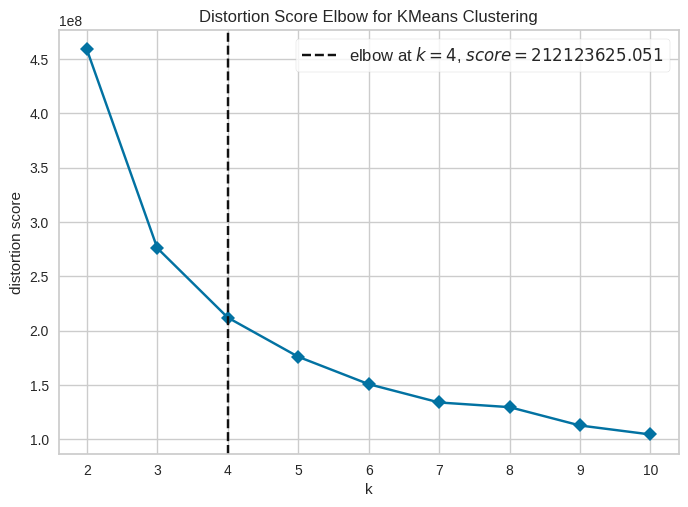

In [34]:
plot_model(kmeans, plot = 'elbow')

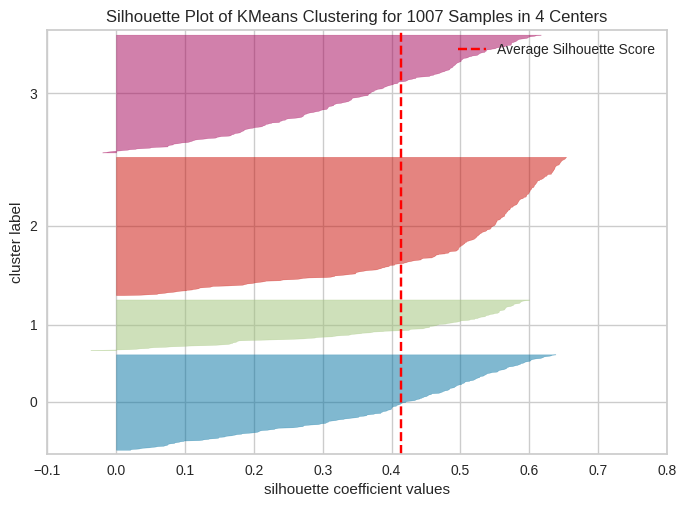

In [35]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [36]:
# check docstring to see available plots
# help(plot_model)

In [37]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,pokemon_id,pokemon_name_Bulbasaur,pokemon_name_Ivysaur,pokemon_name_Venusaur,pokemon_name_Charmander,pokemon_name_Charmeleon,pokemon_name_Charizard,pokemon_name_Squirtle,pokemon_name_Wartortle,pokemon_name_Blastoise,...,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb,Cluster
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.150000,1.600000,0.200000,True,False,True,True,True,True,Cluster 2
1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.150000,1.600000,0.200000,False,True,True,True,True,True,Cluster 0
2,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.150000,1.600000,0.200000,False,True,True,True,True,True,Cluster 3
3,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.150000,1.600000,0.200000,True,False,True,True,True,True,Cluster 2
4,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.150000,1.600000,0.200000,False,True,True,True,True,True,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1
1003,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1
1004,1006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1
1005,1007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159093,1.600996,0.204701,False,False,False,False,False,False,Cluster 1


In [39]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['pokemon_id', 'base_attack',
                                              'base_defense', 'base_stamina',
                                              'candy_required', 'distance',
                                              'max_cp', 'attack_probability',
                                              'base_capture_rate',
                                              'base_flee_rate',
                                              'dodge_probability',
                                              'max_pokemon_action_frequency',
                                              'min_pokemon_action_frequency'],
                                     transformer=SimpleImp...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['pokemon_name', 'type'

In [40]:
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['pokemon_id', 'base_attack',
                                             'base_defense', 'base_stamina',
                                             'candy_required', 'distance',
                                             'max_cp', 'attack_probability',
                                             'base_capture_rate',
                                             'base_flee_rate',
                                             'dodge_probability',
                                             'max_pokemon_action_frequency',
                                             'min_pokemon_action_frequency'],
                                    transforme...
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['pokemon_name', 'type', 'rarity',
                                             'charged_moves', 'fast_moves'],
                                    transformer=OneHotEncoder(cols=['pokemon_name',
                                                                    'type',
                                                                    'rarity',
                                                                    'charged_moves',
                                                                    'fast_moves'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [ ]:
# deploy model on aws s3
# deploy_model(kmeans, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws